In [190]:
import pandas as pd
df = pd.read_csv('titanic-passengers.csv', sep = ';')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [191]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [193]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [194]:
df["Cabin"].fillna(df["Cabin"].value_counts().index[0], inplace = True )


In [195]:
df["Embarked"].fillna(df["Embarked"].value_counts().index[0], inplace  =True)


In [196]:
df["Age"].fillna(df["Age"].mean(), inplace = True)

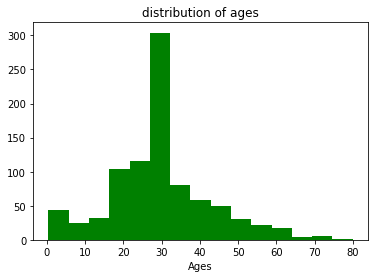

In [197]:
#new_df = df.drop(["PassengerId", "Survived","Pclass","Name","Sex","SibSp", "Parch","Ticket",])
#import seaborn as sns 
#sns.distplot(df['Age'], hist = True, kde = True , color = 'green')
import matplotlib.pyplot as plt
import seaborn as sns
plt.title("distribution of ages")
plt.xlabel("Ages")
plt.hist(df["Age"], bins = 15 , rwidth= 1, color= 'g')
plt.show()


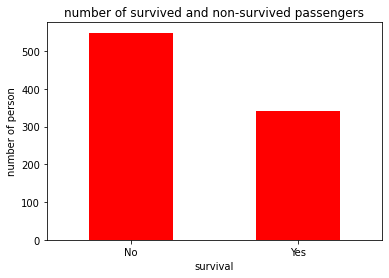

In [198]:
plt.xlabel("survival")
plt.ylabel("number of person")
plt.title("number of survived and non-survived passengers")
df_new = df["Survived"].value_counts()
df_new.plot.bar(rot = 0, color= 'red')

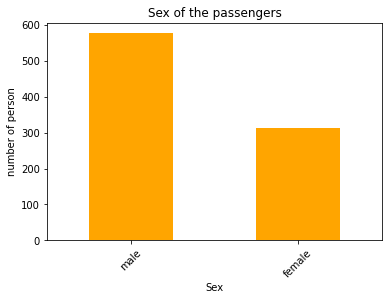

In [199]:
plt.xlabel("Sex")
plt.ylabel("number of person")
plt.title("Sex of the passengers")
df_new = df["Sex"].value_counts()
df_new.plot.bar(rot = 45,color= 'orange' )

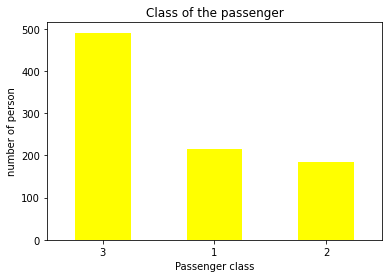

In [200]:
plt.xlabel("Passenger class")
plt.ylabel("number of person")
plt.title("Class of the passenger")
df_new = df["Pclass"].value_counts()
df_new.plot.bar(rot = 0, color= 'yellow')

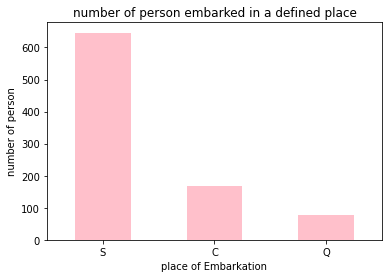

In [201]:
plt.xlabel("place of Embarkation")
plt.ylabel("number of person")
plt.title("number of person embarked in a defined place")
df_new = df["Embarked"].value_counts()
df_new.plot.bar(rot = 0, color= 'pink')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


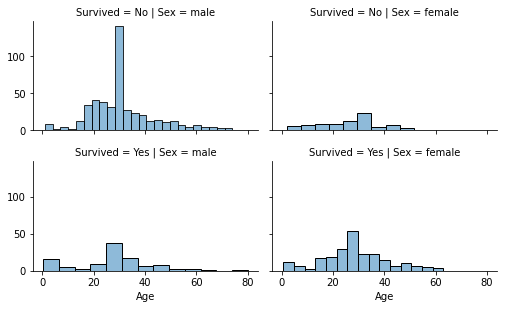

In [202]:

grid=sns.FacetGrid(df,row="Survived" , col="Sex",size=2.2, aspect=1.6)
grid.map(sns.histplot,"Age", alpha=.5)
plt.xlabel("Age")
grid.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


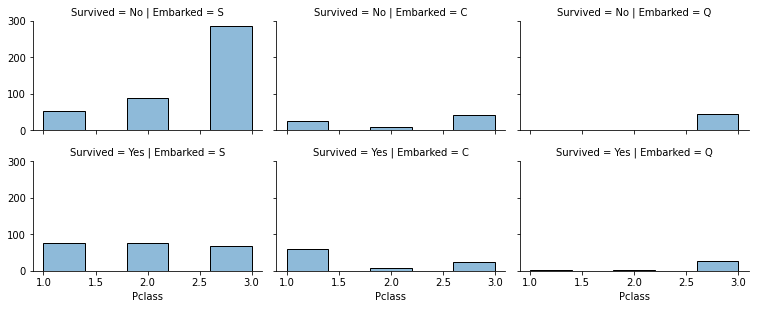

In [203]:
grid=sns.FacetGrid(df,row="Survived" , col="Embarked",size=2.2, aspect=1.6)
grid.map(sns.histplot,"Pclass", alpha=.5, bins = 5)
grid.add_legend()

None


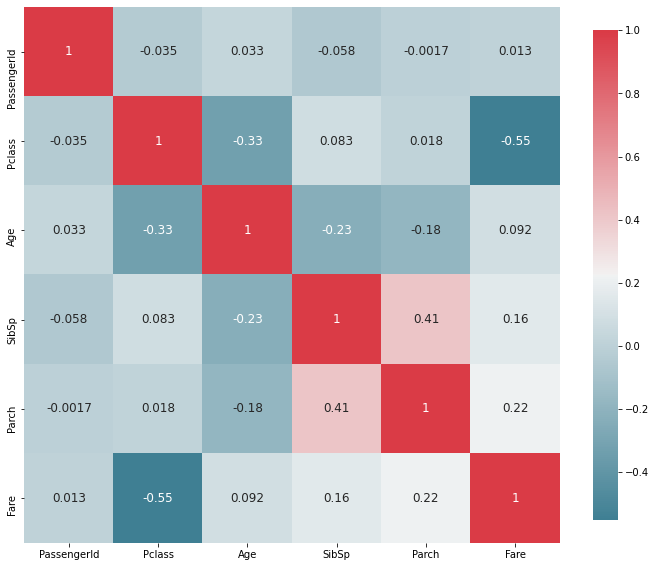

In [204]:
def plot_correlation_map( df ):
    corr = df.corr() #1 
    s , ax = plt.subplots( figsize =( 12 , 10 ) ) #2
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True ) #3
    s = sns.heatmap( #4
        corr,#5
        cmap = cmap,#6
        square=True,#7 
        cbar_kws={ 'shrink' : .9 },#8
        ax=ax, #9
        annot = True,#10 
        annot_kws = { 'fontsize' : 12 }#11

        )
print(plot_correlation_map(df))

this function allows us to create a map where we can find the correlation set between each two features of the dataset and allows as to determine its intensity with the color of the diverging palette.
1: we created a correlation between each two feature of the dataset 
2: we created two axes (x,y) for a figure s and we determined the size of x-axis = 12 and y-axis = 10
3: we created a diverging palette ( a palette with diverging colors from light to intense) and we determinated their extreme values (220 , 10), cmap = true applies the parametres given ( like the extremes of colors intensity )
4 : in this step we started creating heatmap and define its parameters 
5: we determined that the correlation used in this heatmap is the one that we already set 
6: we determinated the parameter of the color deviation (cmap) of this heatmap  that we already set 
7: we attributed the bool true to square so that each cell will be square-shaped.
8: allow as to increase the size of the colorbar
9: setting the ax 
10: If True, it allows us to write the data value in each cell.
11: allow as to increase the size of the data value's font



In [205]:
cleanup={"Survived":{"Yes":1, "No": 0}}  
df.replace(cleanup, inplace=True)
df[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean()


,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [206]:
df_new = df.drop(["PassengerId","Name","Cabin","Ticket"], axis=1)
df_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,male,28.000000,0,0,13.0000,S
1,0,3,male,25.000000,0,0,7.6500,S
2,0,3,male,20.000000,0,0,7.8542,S
3,0,3,female,29.000000,0,4,21.0750,S
4,0,1,male,31.000000,1,0,52.0000,S
...,...,...,...,...,...,...,...,...
886,1,2,female,14.000000,1,0,30.0708,C
887,0,3,male,22.000000,0,0,7.2292,C
888,0,3,female,30.000000,0,0,8.6625,S
889,0,3,male,29.699118,0,0,7.8958,S


In [207]:

title = []
for i in df["Name"] :
  i = i.split(',')[1].split('.')[0]
  title.append(i)
title1 = pd.Series(title, name='Title')
df1 = df_new.join(title1)
df1




,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,2,male,28.000000,0,0,13.0000,S,Mr
1,0,3,male,25.000000,0,0,7.6500,S,Mr
2,0,3,male,20.000000,0,0,7.8542,S,Mr
3,0,3,female,29.000000,0,4,21.0750,S,Mrs
4,0,1,male,31.000000,1,0,52.0000,S,Mr
...,...,...,...,...,...,...,...,...,...
886,1,2,female,14.000000,1,0,30.0708,C,Mrs
887,0,3,male,22.000000,0,0,7.2292,C,Mr
888,0,3,female,30.000000,0,0,8.6625,S,Miss
889,0,3,male,29.699118,0,0,7.8958,S,Mr


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


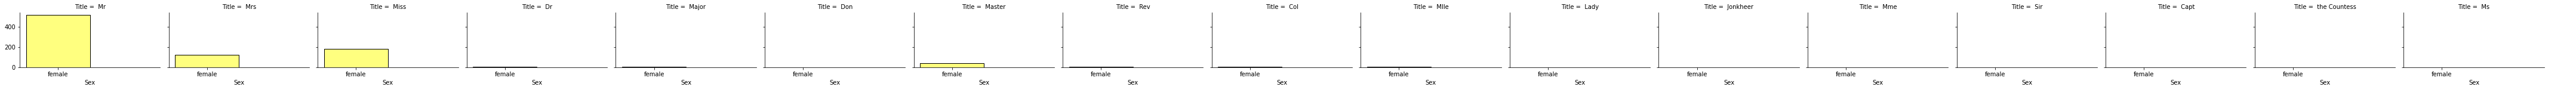

In [208]:
grid1 = sns.FacetGrid(df1, col="Title",size=2.2, aspect=1.6)
grid1.map(sns.histplot, 'Sex', color='yellow',alpha = .5)
grid1.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


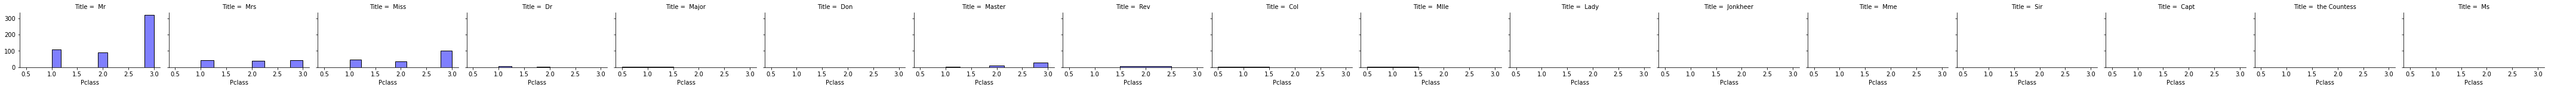

In [209]:
grid2 = sns.FacetGrid(df1, col="Title",size=2.2, aspect=1.6)
grid2.map(sns.histplot, 'Pclass', color='blue',alpha = .5)
grid2.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


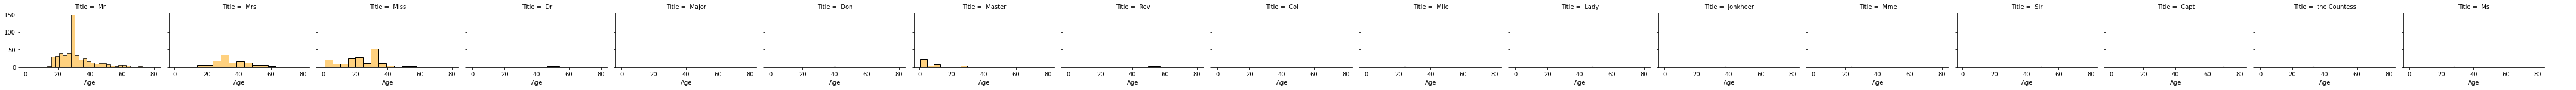

In [210]:
grid3 = sns.FacetGrid(df1, col="Title",size=2.2, aspect=1.6)
grid3.map(sns.histplot, 'Age', color='orange',alpha = .5)
grid3.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


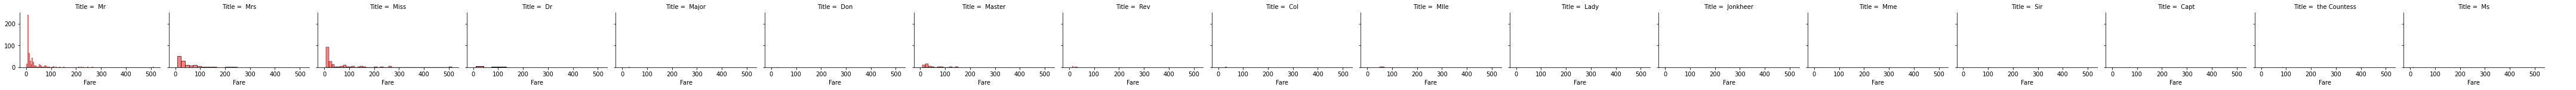

In [211]:
grid4 = sns.FacetGrid(df1, col="Title",size=2.2, aspect=1.6)
grid4.map(sns.histplot, 'Fare', color='red',alpha = .5)
grid4.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


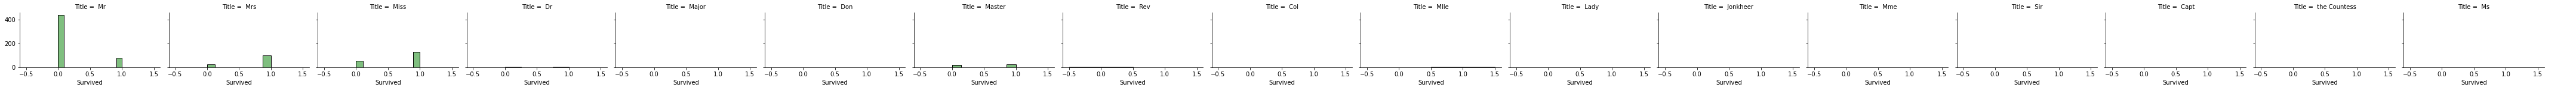

In [212]:
grid5 = sns.FacetGrid(df1, col="Title",size=2.2, aspect=1.6)
grid5.map(sns.histplot, 'Survived', color='green',alpha = .5)
grid5.add_legend()

In [213]:
title_dict={'Title' : 
                    {"Capt":"Officer",
                    "Col":"Officer",
                    "Major":"Officer",
                    "Dr":"Officer",
                    "Rev":"Officer",
                    "Jonkheer":"Royalty",
                    "Don":"Royalty",
                    "Sir" :"Royalty",
                    "Lady" :"Royalty",
                    "the Countess":"Royalty",
                    "Dona":"Royalty",
                    "Mme":"Miss",
                    "Mlle":"Miss",
                    "Miss" :"Miss",
                    "Ms":"Mrs",
                    "Mr" :"Mrs",
                    "Mrs" :"Mr",
                    "Master" :"Master" }}  
df_new = df1.replace(title_dict, regex = True)
df_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,2,male,28.000000,0,0,13.0000,S,Mrs
1,0,3,male,25.000000,0,0,7.6500,S,Mrs
2,0,3,male,20.000000,0,0,7.8542,S,Mrs
3,0,3,female,29.000000,0,4,21.0750,S,Mrs
4,0,1,male,31.000000,1,0,52.0000,S,Mrs
...,...,...,...,...,...,...,...,...,...
886,1,2,female,14.000000,1,0,30.0708,C,Mrs
887,0,3,male,22.000000,0,0,7.2292,C,Mrs
888,0,3,female,30.000000,0,0,8.6625,S,Miss
889,0,3,male,29.699118,0,0,7.8958,S,Mrs


In [214]:
#df_new = df1.replace(["Capt","Col","Major","Dr","Rev","Jonkheer","Don","Sir" ,"Lady" ,"the Countess","Dona","Mme","Mlle","Miss" ,"Ms","Mr" ,"Mrs" ,"Master"],["Officer","Officer","Officer","Officer","Officer","Royalty","Royalty","Royalty","Royalty","Royalty","Royalty","Miss","Miss","Miss","Mrs","Mrs","Mr","Master"], regex=True)
#df_new

In [215]:
df_new["Title"].value_counts()

 Mrs        643
 Miss       185
 Master      40
 Officer     18
 Royalty      5
Name: Title, dtype: int64

In [216]:
#title_new = []
#for x in df1["Title"] :
 # if x == "Mr":
   # title_new.append("Mrs")
  #elif x == "Ms":
   # title_new.append("Mrs")
 # else : 
   # title_new.append(x)
#title_new1 = pd.Series(title_new, name='Title_new')
#df2 = df1.join(title_new1)
#df2




/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


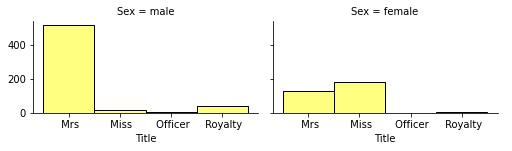

In [217]:
grid6 = sns.FacetGrid(df_new, col="Sex",size=2.2, aspect=1.6)
grid6.map(sns.histplot, 'Title', color='yellow',alpha = .5)
grid6.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


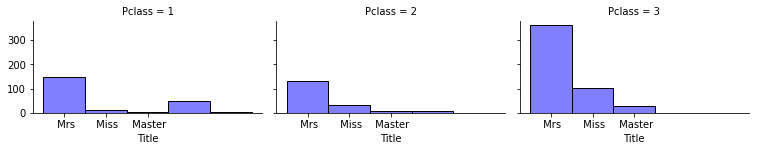

In [218]:
grid7 = sns.FacetGrid(df_new, col="Pclass",size=2.2, aspect=1.6)
grid7.map(sns.histplot, 'Title', color='blue',alpha = .5)
grid7.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


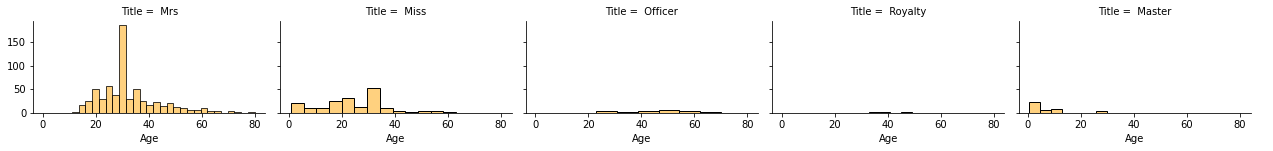

In [219]:
grid8 = sns.FacetGrid(df_new, col="Title",size=2.2, aspect=1.6)
grid8.map(sns.histplot, 'Age', color='orange',alpha = .5)
grid8.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


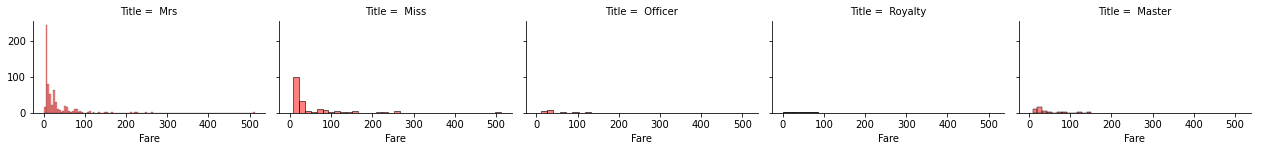

In [220]:
grid9 = sns.FacetGrid(df_new, col="Title",size=2.2, aspect=1.6)
grid9.map(sns.histplot, 'Fare', color='red',alpha = .5)
grid9.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


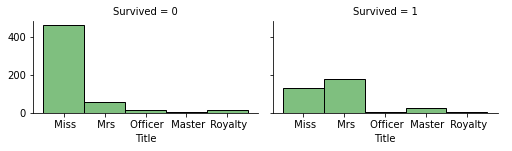

In [221]:
grid10 = sns.FacetGrid(df_new, col="Survived",size=2.2, aspect=1.6)
grid10.map(sns.histplot, 'Title', color='green',alpha = .5)
grid10.add_legend()

In [223]:
df_new['FamilySize'] = df_new['Parch'] + df_new['SibSp']
df_new = df_new.drop(["SibSp","Parch"], axis=1)
df_new


,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,2,male,28.000000,13.0000,S,Mrs,0
1,0,3,male,25.000000,7.6500,S,Mrs,0
2,0,3,male,20.000000,7.8542,S,Mrs,0
3,0,3,female,29.000000,21.0750,S,Mrs,4
4,0,1,male,31.000000,52.0000,S,Mrs,1
...,...,...,...,...,...,...,...,...
886,1,2,female,14.000000,30.0708,C,Mrs,1
887,0,3,male,22.000000,7.2292,C,Mrs,0
888,0,3,female,30.000000,8.6625,S,Miss,0
889,0,3,male,29.699118,7.8958,S,Mrs,0


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


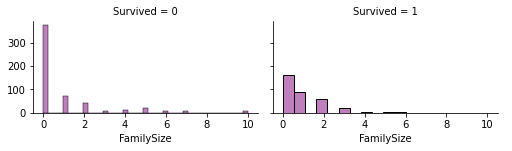

In [224]:
grid11 = sns.FacetGrid(df_new, col="Survived",size=2.2, aspect=1.6)
grid11.map(sns.histplot, 'FamilySize', color='purple',alpha = .5)
grid11.add_legend()


In [225]:
df_new['FamilySize'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: FamilySize, dtype: int64

This feature is not useful seeing that we couldn't conclude the survival rate  from the familysize. we see that the biggest number of non-survived people have 0 member in their family and also the biggest number of survived people have 0 member in their family and that's because the ùost of the people in this journey have 0 members in their family( check :  df_new['FamilySize'].value_counts() ) 